# < IMPORT LIBRARIES >

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk.tokenize as nltok

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Github/Speech-And-Language-Processing

/content/drive/MyDrive/Github/Speech-And-Language-Processing


# 0. Dataset: "News Category Dataset"

## (If needed) Connect Kaggle Token

In [ ]:
from google.colab import files
files.upload() # Upload the Kaggle token file (kaggle.json)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

## 0.1 Download Data
* from Kaggle : https://www.kaggle.com/datasets/rmisra/news-category-dataset

In [21]:
!kaggle datasets download -d rmisra/news-category-dataset

 94% 25.0M/26.5M [00:01<00:00, 32.5MB/s]
100% 26.5M/26.5M [00:01<00:00, 20.9MB/s]


In [27]:
cd /content/drive/MyDrive/Github/Speech-And-Language-Processing/Implementations

/content/drive/MyDrive/Github/Speech-And-Language-Processing/Implementations


In [28]:
!unzip news-category-dataset.zip

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


# 1. Data Analysis

Take a look at the raw data

In [7]:
cd /content/drive/MyDrive/Github/Speech-And-Language-Processing/Implementations

/content/drive/MyDrive/Github/Speech-And-Language-Processing/Implementations


In [8]:
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


Remove unnecessary columns

In [9]:
new_df = df.drop(columns=['authors','link','date'])
new_df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


Combine the '*headline*' and '*short_description*'



In [10]:
final_df = new_df.copy()
final_df['news_combined'] = final_df['headline'] + final_df['short_description']
final_df.drop(['headline','short_description'], inplace=True, axis=1)
final_df['len_news'] = final_df['news_combined'].apply(lambda x: len(str(x)))
final_df.head()

,category,news_combined,len_news
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...,230
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li...",248
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,133
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,215
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...,233


In [31]:
# Data Size
print("The number of documents are: {}".format(len(final_df))); print("\n")

# Label Distribution
print(final_df.info()); print("\n")
print(final_df.describe())

The number of documents are: 209527


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   category       209527 non-null  object
 1   news_combined  209527 non-null  object
 2   len_news       209527 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ MB
None


            len_news
count  209527.000000
mean      172.624025
std        78.552970
min         0.000000
25%       122.000000
50%       170.000000
75%       207.000000
max      1486.000000


### Findings

1.   The length is around 172
2.   There are some empty data -> we should remove them





In [131]:
# Remove empty data
df = final_df[final_df['len_news'] > 0]
display(df)

,category,news_combined,len_news
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...,230
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li...",248
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...,133
3,PARENTING,The Funniest Tweets From Parents This Week (Se...,215
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...,233
...,...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,182
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,191
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",220
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,173


## 1.1 Distribution of Data

In [133]:
categories = df['category'].unique()
print("Number of Categories: {}".format(len(categories))); print()

# Count data of category
df['category'].value_counts()

Number of Categories: 42



POLITICS          35601
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6346
FOOD & DRINK       6340
BUSINESS           5991
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2943
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2578
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

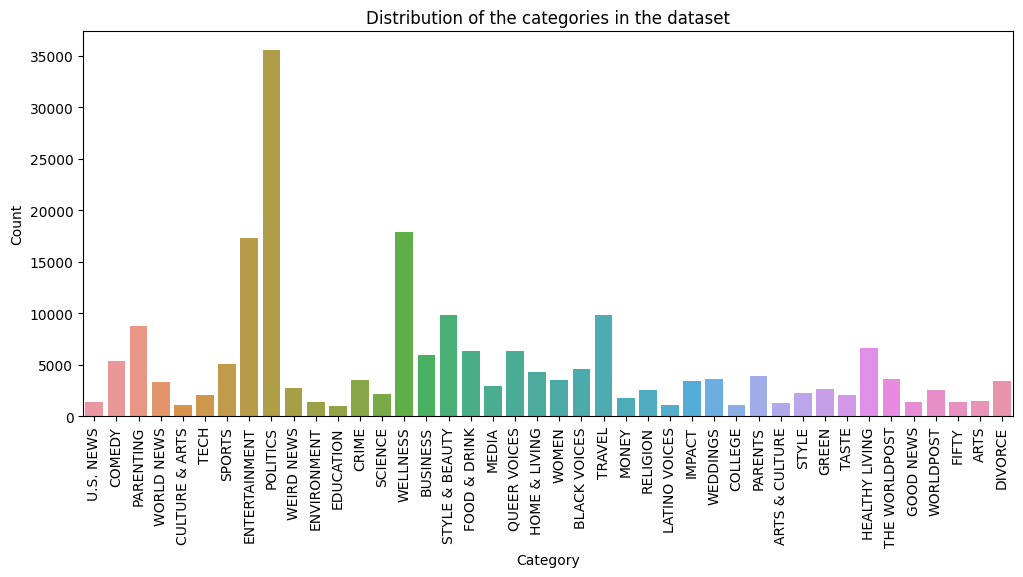

In [134]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='category')

plt.title('Distribution of the categories in the dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

There are too much categories and they seem to be imbalanced. 

We can do..

1.   Downsampling
  * but downsampling to the least count will shrink the number of data too much
  * -> we could group some relelvant data


2.   Upsampling
  * if the least-count label still seems to be so small after grouping, we can try upsampling






# 2. Data Processing

## 2.1 Remove unclear categories

In [130]:
def show_examples(category):
  cnt_format = "\n\"{}\": {}"; eg_format = "\a(e.g.) {}"
  news = df[df['category'] == category]
  print(cnt_format.format(category, len(news)))
  print(eg_format.format(news['news_combined'].values[0]))
  print(eg_format.format(news['news_combined'].values[1]))


# 1. Check Examples here
show_examples("WEIRD NEWS")
show_examples("IMPACT")
show_examples("FIFTY")

show_examples("PARENTS")
show_examples("PARENTING")

show_examples("MONEY")
show_examples("BUSINESS")


show_examples("THE WORLDPOST")


show_examples("ENTERTAINMENT")

show_examples("GREEN")

show_examples("MEDIA")

show_examples("HEALTY LIVING")



"WEIRD NEWS": 2777
(e.g.) 'French Spider-Man' Celebrates 60th Birthday With A Massive Skyscraper ClimbAlain Robert, known as the "French Spider-Man," has climbed the Burj Khalifa and the Empire State Building.
(e.g.) German Customs Officials Follow Trail Of Slime And Find Bags Of Giant Snails“Never in the history of the Duesseldorf customs office has a trail of slime led us to smuggled goods,” spokesman Michael Walk told the media.

"IMPACT": 3484
(e.g.) Why You Shouldn't Recycle ReceiptsCVS and other companies are shortening excessively long receipts and removing potentially harmful chemicals. That's good for the environment and your health.
(e.g.) How One Of The World's Rarest Hummingbirds Is Helping Save The Cloud Forests Of PeruThe marvelous spatuletail hummingbird inspired a culture of conservation in the Andes Mountains.

"FIFTY": 1401
(e.g.) Love, Facebook and Infidelity
(e.g.) Boomers Were Time's "Man of the Year" Fifty Years Ago

"PARENTS": 3955
(e.g.) 40 Tweets That S

IndexError: ignored

## 2.1 Re-Group Similar Categories


```
* NEWS: { U.S. NEWS, WORLD NEWS, THE WORLDPOST, WORLDPOST}
* SOCIAL: { LATINO VOICES, BLACK VOICES, QUEER VOICES, RELIGION, IMPACT, CRIME }
* CULTURE & ART: { CULTURE & ARTS, ARTS & CULTURE, ARTS }
* EDUCATION: { EDUCATION, COLLEGE }
* LIVING: { HOME & LIVING, HEALTHY LIVING }
* FOOD: { TASTE, FOOD & DRINK }
* FAMILY: { WEDDING, PARENTING, PARENTS, DIVORCE }
* ENVIRONMENT: { GREEN, ENVIRONMENT }
* ECONOMICS: { MONEY, BUSINESS }
* SCIENCE & TECH: { SCIENCE, TECH }
* STYPE & BEAUTY: { STYLE, STYLE & BEAUTY }
* ETC: { FIFTY, GOOD NEWS, WEIRD NEWS }
```

In [126]:
news = ["U.S. NEWS", "WORLD NEWS", "THE WORLDPOST", "WORLDPOST"]
social = ["LATINO VOICES", "BLACK VOICES", "QUEER VOICES", "RELIGION", "IMPACT", "CRIME"]
culture_and_art = ["CULTURE & ARTS", "ARTS & CULTURE", "ARTS"]
education = ["EDUCATION", "COLLEGE"]
living = ["HOME & LIVING", "HEALTHY LIVING"]
food = ["TASTE", "FOOD & DRINK"]
family = ["WEDDINGS", "PARENTING", "PARENTS", "DIVORCE"]
environment = ["GREEN", "ENVIRONMENT"]
economics = ["MONEY", "BUSINESS"]
science_and_tech = ["SCIENCE", "TECH"]
style_and_beauty = ["STYLE", "STYLE & BEAUTY"]
others = {"FIFTY", "GOOD NEWS", "WEIRD NEWS"}

new_categories = {"NEWS": news, "SOCIAL": social, "CULTURE & ART": culture_and_art, "EDUCATION": education, "LIVING": living, "FOOD": food, "FAMILY": family, 
                  "ENVIRONMENT": environment, "ECONOMICS": economics, "SCIENCE & TECH": science_and_tech, "STYLE & BEAUTY": style_and_beauty, "OTHERS": others}

for category, names in new_categories.items():
  for name in names:
    df.loc[df['category'] == name, "category"] = category

Numner of Categories: 20

POLITICS          35601
SOCIAL            21682
FAMILY            19825
WELLNESS          17945
ENTERTAINMENT     17362
STYLE & BEAUTY    12068
LIVING            11014
NEWS              10918
TRAVEL             9900
FOOD               8436
ECONOMICS          7747
OTHERS             5576
COMEDY             5400
SPORTS             5077
SCIENCE & TECH     4310
ENVIRONMENT        4066
CULTURE & ART      3922
WOMEN              3572
MEDIA              2943
EDUCATION          2158
Name: category, dtype: int64



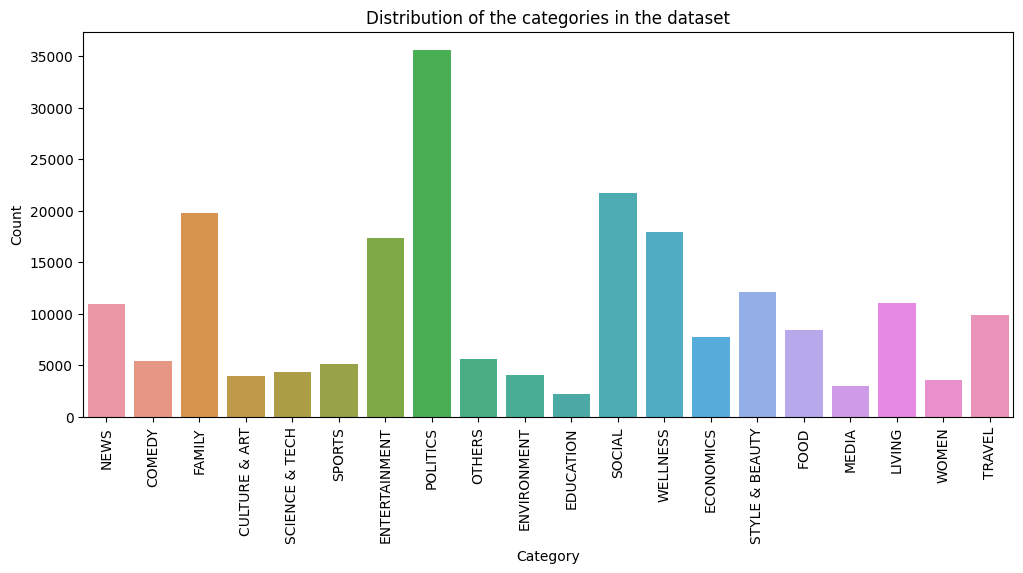

In [127]:
categories = df['category'].unique()
print("Numner of Categories: {}".format(len(categories))); print()

# Count data of category
print(df['category'].value_counts()); print()

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='category')

plt.title('Distribution of the categories in the dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

# 1. TF-IDF